In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
merged_rid_cit_df = pd.merge(ride_df, city_df, on="city")

# Display the data table for preview

merged_rid_cit_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


## Bubble Plot of Ride Sharing Data

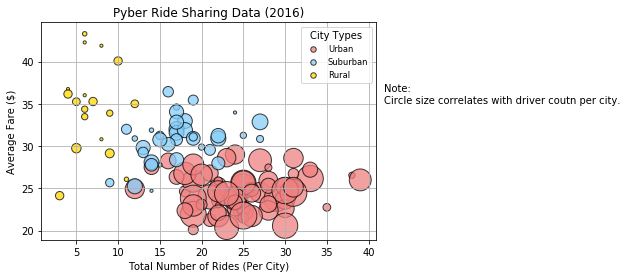

In [3]:
# Obtain the x and y coordinates for each of the three city types
#Break down by filtering city type.  Separate with equal signs for visual ease.

#======================Urban=======================================
urban_cities = merged_rid_cit_df.loc[merged_rid_cit_df["type"]=="Urban",:]
grp_urban_city = urban_cities.groupby("city")
# x axis
urban_tot_rides_city = grp_urban_city["ride_id"].count()
#y axis
urban_mean_fare_city = grp_urban_city["fare"].mean()
#bubble size
urban_driver_count_city = grp_urban_city["driver_count"].mean()
#===================================================================

#======================Rural=======================================
rural_cities = merged_rid_cit_df.loc[merged_rid_cit_df["type"]=="Rural",:]
grp_rural_city = rural_cities.groupby("city")
# x axis
rural_tot_rides_city = grp_rural_city["ride_id"].count()
#y axis
rural_mean_fare_city = grp_rural_city["fare"].mean()
#bubble size
rural_driver_count_city = grp_rural_city["driver_count"].mean()
#===================================================================

#======================Suburban=======================================
suburb_cities = merged_rid_cit_df.loc[merged_rid_cit_df["type"]=="Suburban",:]
grp_suburb_city = suburb_cities.groupby("city")
# x axis
suburb_tot_rides_city = grp_suburb_city["ride_id"].count()
#y axis
suburb_mean_fare_city = grp_suburb_city["fare"].mean()
#bubble size
suburb_driver_count_city = grp_suburb_city["driver_count"].mean()
#===================================================================



# Build the scatter plots for each city types
#Urban
plt.scatter(urban_tot_rides_city, urban_mean_fare_city, marker="o", 
            facecolors="lightcoral", edgecolors="black", s=urban_driver_count_city*10, 
            alpha=0.75, label="Urban")

#Suburban
plt.scatter(suburb_tot_rides_city, suburb_mean_fare_city, marker="o", 
            facecolors="lightskyblue", edgecolors="black", s=suburb_driver_count_city*10, 
            alpha=0.75, label="Suburban")

#Rural
plt.scatter(rural_tot_rides_city, rural_mean_fare_city, marker="o", 
            facecolors="gold", edgecolors="black", s=rural_driver_count_city*10, 
            alpha=0.75, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()

# Create a legend  
lgnd = plt.legend(loc="best", scatterpoints=1, fontsize="small", title="City Types")
#legend bubbles are different sizes.  Resize legend handles like they were a list.  Googled this.  Is there a better way????
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

#ovreall sizing looks great.  No need to set limits?

# Incorporate a text label regarding circle size
plt.gcf().text(0.92, 0.6, "Note:\nCircle size correlates with driver coutn per city.")
# Save Figure
plt.savefig("Pyber_Scatter_ML.png")

plt.show()

## Total Fares by City Type

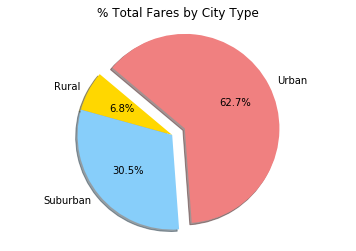

In [4]:
# Calculate Type Percents
#Group cities
cit_group_type = merged_rid_cit_df.groupby("type")
tot_fare_type = cit_group_type["fare"].sum()

# Build Pie Chart
labels = tot_fare_type.index
sizes = tot_fare_type
colors = [ "gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.15)

plt.pie(sizes, explode=explode, labels=labels, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% Total Fares by City Type")

# Save Figure
plt.savefig("Pyber_PieFaresType_ML.png")

plt.show()


## Total Rides by City Type

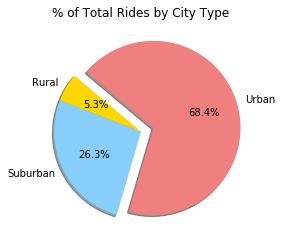

In [5]:
# Calculate Ride Percents
#get total rides using previous group by city
tot_ride_type = cit_group_type["ride_id"].count()

# Build Pie Chart 
#can use colors from previous chart.  Could probaly also use the index, but if it sorts it oddly it might cause a problem.
labels = tot_ride_type.index
sizes = tot_ride_type

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides by City Type")

# Save Figure
plt.savefig("Pyber_PieRidesType_ML.png")

plt.show()

## Total Drivers by City Type

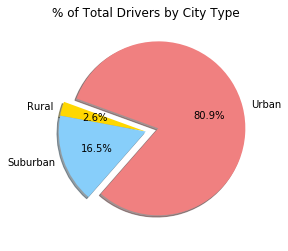

In [6]:
# Calculate Driver Percents
#use city type group from above
city_type = city_df.groupby("type")
drivers_city= city_type["driver_count"].sum()
drivers_city

# Build Pie Chart 
labels = drivers_city.index
sizes = drivers_city

plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=160)

plt.title("% of Total Drivers by City Type")

# Save Figure
plt.savefig("Pyber_PieRidersType_ML.png")

plt.show()

Observations:
Observation 1:
There are more drivers, more rides, and a higher total fare in urban areas than suburban and rural areas.  Suburban areas have higher driver count, more rides, and a higher total fare than rural areas.  This is understandable as there are more overall people in urban areas than rural areas.

Observation 2:
Although there were more rides and higher total fares in urban areas, it appears the average fares were significantly less than in suburban and rural areas.  This makes sense since urban areas are compact, and many of the rides would go short distances.  The rides would be shorter, but since there are so many more people and rides it would make the total fares higher.

Observation 3:
Rural areas had the highest average fares.  This makes sense as fares are based off of distance.  In rural areas most rides would have to cover a long distance since things are so sparsely located. 

